# Naive Bayes

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Split Data

In [13]:
def split_data(data, percentage):
    train, test = np.split(data.sample(frac=1.0, random_state=1), [int(percentage * len(data))])
    X_train = train.loc[: ,'s_length':'p_width']
    X_test = test.loc[: ,'s_length':'p_width']
    y_train = train['target']
    y_test = test['target']

    return X_train, X_test, y_train, y_test

## Calculate Probability of each class, Mean and Std

In [14]:
def fit(X_train, y_train):
    y_probability = ( pd.value_counts(y_train) / len(y_train) )

    mean_data = pd.DataFrame(np.empty((len(y_probability), len(list(X_train)))) ,index=list(y_probability.index) , columns=list(X_train))
    std_data = mean_data.copy()

    for i in y_probability.index:
        d = X_train[y_train == i]
        mean_data.loc[i] = d.mean(axis=0)
        std_data.loc[i] = d.std(axis=0)
    
    return y_probability, mean_data, std_data

## Gausian Function

In [15]:
def gnb(x, c, j):
    x_std = std_data.loc[c,j]
    x_mean = mean_data.loc[c,j]
    e = np.exp(-( ((x - x_mean) ** 2) / (2 * (x_std ** 2) )) )

    return e / ( np.sqrt(2 * np.pi) * x_std)

## Calculate Conditional Probability for each class

In [16]:
def probability(c,x):
   p_c_x = y_probability[c]
   for key,value in x.iteritems():
      p_c_x *= gnb(value, c, key)
      
   return p_c_x

## Predict Function

In [17]:
def predict(x):
    p = pd.Series(np.empty(len(y_probability)), index=list(y_probability.index))

    for i in y_probability.index:
        p[i] = probability(i, x)
        
    return p.idxmax()

## Naive Bayes Function

In [18]:
def naiveBayes(data, train):
    X_train, X_test, y_train, y_test = split_data(data, train)
    global y_probability, mean_data, std_data
    y_probability, mean_data, std_data = fit(X_train, y_train)

    y_pred = X_test.apply(predict, axis=1)
    accuracy = ( len(y_pred[y_pred == y_test]) / len(y_test) ) * 100

    return accuracy


## Load Iris Data

In [19]:
iris = load_iris()
X = iris.data
y = iris.target

X = np.apply_along_axis(lambda c: (c - c.min()) / (c.max() - c.min()), 0, X)

data_set = np.hstack((X, y.reshape(len(y),1)))

data_set = pd.DataFrame(data_set, columns=['s_length', 's_width', 'p_length', 'p_width', 'target'])

## Plots b/w attributes of Iris

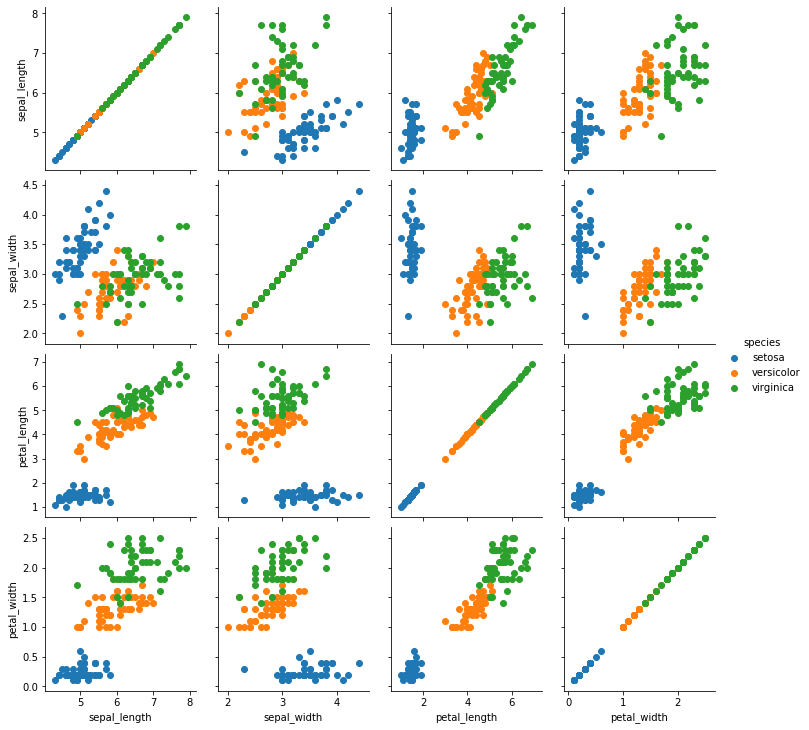

In [20]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris, hue='species')
g.map(plt.scatter)
g.add_legend()

## Accuracy

In [21]:
train = np.arange(0.5, 1.0, 0.05) 
accuracy = []

for i in train:
    acc = naiveBayes(data_set, i)
    accuracy.append(acc)   

accuracy

[94.66666666666667,
 94.11764705882352,
 93.33333333333333,
 92.45283018867924,
 91.11111111111111,
 89.47368421052632,
 93.33333333333333,
 91.30434782608695,
 86.66666666666667,
 87.5]

## Plot Train_size vs Accuracy(in %)

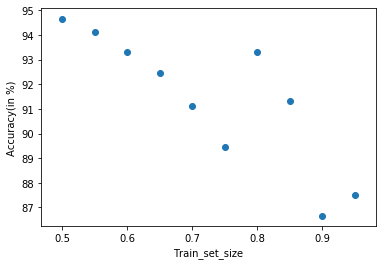

In [22]:
plt.scatter(train, accuracy)
plt.xlabel('Train_set_size')
plt.ylabel('Accuracy(in %)')
plt.show()